# <u> Decision Trees </u>

Los árboles de decisión son algoritmos versátiles de aprendizaje automático que pueden realizar tareas de clasificación y regresión, e incluso tareas de salida múltiple. Son algoritmos muy potentes, capaces de ajustar conjuntos de datos complejos. Los árboles de decisión hacen splits de cada row o linea del dataset en dos o más conjuntos homogéneos en función de la variable que "más separa", esto puede ser mayor Gini index o Entropia. Vimos la métrica en clase

Los árboles de decisión son los componentes fundamentales de los algoritmos más potentes en la actualidad.

### <u> Ventajas </u>
- <b><u>Fácil de entender</u></b>: la salida del árbol de decisión es muy fácil de entender incluso para personas sin formación analíticos. No requiere ningún conocimiento estadístico para leerlos e interpretarlos. Su representación gráfica es muy intuitiva y los usuarios pueden relacionar fácilmente sus hipótesis.
    
- <b><u>Útil en la exploración de datos</u></b>: el árbol de decisión es una de las formas más rápidas de identificar las variables más significativas y la relación entre dos o más variables. Con la ayuda de los árboles de decisión, podemos crear nuevas variables/características que tengan un mejor poder para predecir la variable objetivo. Puede consultar el artículo (Truco para mejorar el poder del modelo de regresión) para uno de esos trucos. También se puede utilizar en la etapa de exploración de datos. Por ejemplo, estamos trabajando en un problema en el que tenemos información disponible en cientos de variables, el árbol de decisión ayudará a identificar la variable más significativa.
- <b><u>Se requiere menos limpieza de datos</u></b>: requiere menos limpieza de datos en comparación con otras técnicas de modelado. No está influenciado por valores atípicos y faltantes en un grado considerable.
- <b><u>El tipo de datos no es una restricción</u></b>: Puede manejar tanto variables numéricas como categóricas.
- <b><u>Modelo no paramétrico</u></b>: los árboles de decisión se consideran modelos no paramétricos, no porque no tengan parámetros (a menudo tienen muchos) sino porque el número de los parámetros no se determinan antes del entrenamiento, por lo que la estructura del modelo es libre de apegarse a los datos. Por el contrario, un modelo paramétrico como un modelo lineal tiene un número predeterminado de parámetros, por lo que su grado de libertad es limitado, lo que reduce el riesgo de overfitting (pero aumenta el riesgo de infraajuste).

### <u> Desventajas </u>
- <b><u>Overfitting</u></b>: El overfitting es una de las dificultades más prácticas para los modelos de árboles de decisión. Este problema se resuelve estableciendo restricciones en los parámetros del modelo o haciendo "prunning" (tema a profundizar más allá de esta materia")
- <b><u>Pierde un poco de explicabilidad variables continuas</u></b>: En los corte de cada rama el árbol genera cortes a la variable continua, es decir, la discretiza, y puede perder cierta interpretabilidad.

## <u> Entrenamiento y visualización de un árbol de decisiones </u>

Para comprender los árboles de decisión, construyamos uno y veamos cómo hace predicciones.

In [3]:
#!pip install -U scikit-learn

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz

#leer el dataframe


#Remover o borrar la la columna ID



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#seleccionar las columnas 'SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'

#crear x e y. Siendo la variable dependiente, las especies


In [6]:
#instanciar un DecisionTreeClassifier con profundidad de 2, poner el parametro  random_state = 36
#hacer fit

DecisionTreeClassifier(max_depth=2, random_state=36)

In [10]:
#!pip install graphviz

  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
You should consider upgrading via the '/Users/federicomoreno/.pyenv/versions/3.8.12/envs/pyglob/bin/python3.8 -m pip install --upgrade pip' command.


In [11]:
# Visualize the trained Decision Tree by export_graphviz() method
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display


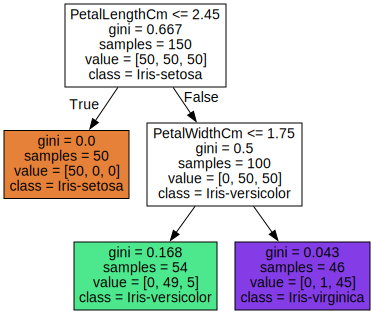

In [12]:
labels = df_iris_X.columns

graph = Source(tree.export_graphviz(tree_clf ,feature_names = labels, class_names = df_iris_y.unique(), max_depth = 2, filled = True))
display(SVG(graph.pipe(format='svg')))

## <u>Hacer predicciones</u>

La clasificación comienza en el root node (profundidad 0, nodo superior) y verifica si la longitud del pétalo de la flor es menor de 2,45 cm. Si es Verdadero, baja al nodo secundario izquierdo de la raíz (profundidad 1, izquierda). Como es un nudo hoja (leave), predice que la flor es una Iris-Setosa (clase=setosa). Si es Falso, baja al nodo secundario derecho de la raíz (profundidad 1, derecha), que no es un nodo de hoja, por lo que plantea otra pregunta: ¿el ancho del pétalo es menor que 1,75 cm? Si es Verdadero, lo más probable es que la flor sea una Iris-Versicolor (profundidad 2, izquierda). Si es Falso, es probable que sea una Iris-Virginica (profundidad 2, derecha).

- <b> <u> Muestras </u> </b>: cuenta a cuántas instancias de entrenamiento se aplica. Por ejemplo, 100 instancias de entrenamiento tienen una longitud de pétalo superior a 2,45 cm (profundidad 1, derecha), de las cuales 54 tienen un ancho de pétalo inferior a 1,75 cm (profundidad 2, izquierda).
- <b> <u> Valor </u> </b>: nos dice a cuántas instancias de entrenamiento de cada clase se aplica este nodo: por ejemplo, el nodo inferior derecho se aplica a 0 Iris-Setosa, 1 Iris-Versicolor , y 45 Iris-Virginica.
- <b> <u> Gini </u> </b>: mide la impureza: un nodo es “puro” (gini=0) si todas las instancias de entrenamiento que aplica pertenecen a la misma clase. Por ejemplo, dado que el nodo izquierdo de profundidad 1 se aplica solo a las instancias de entrenamiento de Iris-Setosa, es puro y su puntaje Gini es 0, el nodo izquierdo de profundidad 2 tiene un puntaje Gini igual a 1: $\frac{0}{ 54}^2$ – $\frac{49}{54}^2$ – $\frac{5}{54}^2$ ≈ 0,168.
-
- <b><u> Entropía </u></b>: De forma predeterminada, se utiliza la medida de impureza de Gini, podemos seleccionar la medida de impureza de entropía en su lugar configurando el hiperparámetro de criterio en "entropía". La entropía de un conjunto es cero cuando contiene instancias de una sola clase. Por ejemplo, dado que el nodo izquierdo de profundidad 1 se aplica solo a las instancias de entrenamiento de Iris-Setosa, es puro y su entropía es 0, el nodo izquierdo de profundidad 2 tiene una entropía igual a − $\frac{49}{54}$ $ \log\grande({\frac{49}{54}}\grande)$ − $\frac{5}{54}$ $\log\grande({\frac{5}{54}}\grande)$ ≈ 0,31.

<b>Nota</b>: la impureza de Gini de un nodo suele ser menor que la de su padre. Esto está garantizado por la función de costo del algoritmo de entrenamiento CART, que divide cada nodo de una manera que minimiza la suma ponderada de las impurezas de Gini de sus hijos. Sin embargo, si un hijo es más pequeño que el otro, es posible que tenga una impureza de Gini más alta que su padre, siempre que este aumento sea más que compensado por una disminución de la impureza del otro hijo.

#### <u> ¿Impureza de Gini o entropía? </u>

La mayoría de las veces no hace una gran diferencia: conducen a árboles similares. La impureza de Gini es un poco más rápida de calcular, por lo que es un buen valor predeterminado. Sin embargo, la impureza de Gini tiende a aislar la clase más frecuente en su propia rama del árbol, mientras que la entropía tiende a producir árboles ligeramente más equilibrados.

## <u> Estimación de probabilidades de clase/clase </u>

Decision Tree puede estimar la probabilidad de que una row/instancia pertenezca a una clase k particular: atraviesa el árbol para encontrar el nodo hoja para esta instancia y devuelve la proporción de instancias de entrenamiento de la clase k en este nodo. Por ejemplo, los pétalos de una flor miden 5 cm de largo y 1,5 cm de ancho. El nodo de hoja correspondiente es el nodo izquierdo de profundidad 2, por lo que el árbol de decisión debería generar las siguientes probabilidades: 0 % para Iris-Setosa $\frac{0}{54}$, 90,7 % para Iris-Versicolor $\frac{49 {54}$, y 9,25% para Iris-Virginica $\frac{5}{54}$.

También puede predecir la clase de instancia. Para la instancia anterior, debería generar Iris-Versicolor (clase 1) ya que tiene la mayor probabilidad

In [13]:
#predecir la probabilidad predict.proba de la siguiente muestra ([[1,1, 5, 1.5]])

/Users/federicomoreno/.pyenv/versions/pyglob/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.        , 0.90740741, 0.09259259]])

In [14]:
#predecir la clase de la siguiente muestra [[1,1, 5, 1.5]])

/Users/federicomoreno/.pyenv/versions/pyglob/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

<b>Nota</b>: como podemos ver en los gráficos a continuación, las características de los pétalos ofrecen una mejor división en comparación con las características de los sépalos. A medida que aumentamos la profundidad del árbol, también clasificará las instancias según las características de Sepal. En el ejemplo de prueba anterior, hemos mantenido las características de Sepal constantes (1).

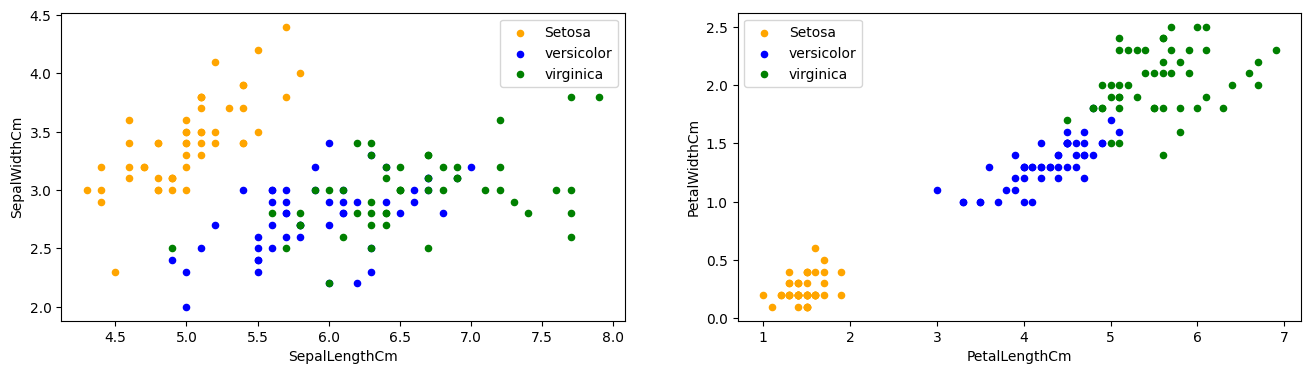

In [15]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,4)

df_iris[df_iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa', ax = ax1)
df_iris[df_iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=ax1)
df_iris[df_iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=ax1)

df_iris[df_iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa', ax = ax2)
df_iris[df_iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=ax2)
df_iris[df_iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=ax2)

plt.show()

## <u>Algoritmo de entrenamiento CART</u>

Scikit-Learn utiliza el algoritmo del árbol de clasificación y regresión (CART) para entrenar árboles de decisión. El algoritmo primero divide el conjunto de entrenamiento en dos subconjuntos utilizando una sola característica k y un umbral $t_k$ (por ejemplo, "longitud de pétalo ≤ 2,45 cm"). ¿Cómo elige k y $t_k$? Busca el par (k, $t_k$) que produce los subconjuntos más puros (ponderados por su tamaño). La función de coste que el algoritmo intenta minimizar viene dada por:

$$J(k, t_k) = \frac{m_{izquierda}}{m} G_{izquierda} + \frac{m_{derecha}}{m} G_{derecha}$$

donde $G_{izquierda/derecha}$ = mide la impureza del subconjunto izquierdo/derecho, $m_{izquierda/derecha}$ = es el número de instancias en el subconjunto izquierdo/derecho.

Una vez que divide con éxito el conjunto de entrenamiento en dos, divide los subconjuntos usando la misma lógica, luego los sub-subconjuntos y así sucesivamente, recursivamente. Deja de recurrir una vez que alcanza un hiperparámetro establecido (profundidad máxima / min_samples_split / min_samples_leaf / min_weight_fraction_leaf / max_leaf_nodes), o si no puede encontrar una división que reduzca la impureza.

<b>Nota: </b> El algoritmo CART es un algoritmo codicioso: busca con avidez una división óptima en el nivel superior y luego repite el proceso en cada nivel. No verifica si la división conducirá o no a la impureza más baja posible varios niveles hacia abajo. Un algoritmo codicioso a menudo produce una solución razonablemente buena, pero no se garantiza que sea la solución óptima.

## <u>Hiperparámetros de regularización</u>

<b><u>Profundidad máxima del árbol (SkLearn - max_depth)</u></b>
- Se utiliza para controlar el sobreajuste, ya que una mayor profundidad permitirá que el modelo aprenda relaciones muy específicas para una muestra en particular.
- Debe sintonizarse usando CV.

<b><u>Muestras mínimas para una división de nodos (SkLearn - min_samples_split)</u></b>
- Define el número mínimo de muestras (u observaciones) que se requieren en un nodo para ser considerado para la división.
- Se utiliza para controlar el sobreajuste. Los valores más altos evitan que un modelo aprenda relaciones que podrían ser muy específicas para la muestra particular seleccionada para un árbol.
- Los valores demasiado altos pueden dar lugar a un ajuste insuficiente, por lo que debe ajustarse mediante CV.

<b><u>Muestras mínimas para un nodo terminal (SkLearn - min_samples_leaf)</u></b>
- Define las muestras mínimas (u observaciones) requeridas en un nodo terminal u hoja.
- Se utiliza para controlar el sobreajuste similar a min_samples_split.
- En general, se deben elegir valores más bajos para problemas de clase desequilibrada porque las regiones en las que la clase minoritaria será mayoritaria serán muy pequeñas.

<b><u>Número máximo de nodos terminales (SkLearn - max_leaf_nodes)</u></b>
- El número máximo de nudos terminales u hojas en un árbol.
- Se puede definir en lugar de max_depth. Dado que se crean árboles binarios, una profundidad de 'n' produciría un máximo de 2^n hojas.

<b><u>Características máximas a considerar para la división (SkLearn - max_features)</u></b>
- El número de funciones a tener en cuenta al buscar la mejor división. Estos serán seleccionados al azar.
- Como regla general, la raíz cuadrada del número total de funciones funciona muy bien, pero debemos verificar hasta el 30-40% del número total de funciones.
- Los valores más altos pueden provocar un ajuste excesivo, pero depende de cada caso.

<b>Nota</b>: Algunos algoritmos funcionan primero entrenando el árbol de decisiones sin restricciones y luego eliminando los nodos innecesarios. Un nodo cuyos "hijos" son todos nodos de hoja se considera innecesario si su pureza no es estadísticamente significativa (hipótesis nula). y sus hijos se eliminan. La poda continúa hasta que se hayan podado todos los nodos innecesarios.

## <u>Complejidad computacional</u>

Hacer predicciones requiere atravesar el árbol de decisiones desde la raíz hasta una hoja. Los árboles de decisión generalmente están aproximadamente equilibrados, por lo que atravesar el árbol de decisión requiere pasar por aproximadamente $O(log_2(m))$ nodos. Dado que cada nodo solo requiere verificar el valor de una característica, la complejidad de predicción general es solo O (log2 (m)), independientemente de la cantidad de características. Por lo tanto, las predicciones son muy rápidas, incluso cuando se trata de grandes conjuntos de entrenamiento.

Sin embargo, el algoritmo de entrenamiento compara todas las características (o menos si se establece max_features) en todas las muestras en cada nodo. Esto da como resultado una complejidad de entrenamiento de O(n × m log(m)) donde n = num. de miedos, m = número de instancias. Para conjuntos de entrenamiento pequeños (menos de unos pocos miles de instancias), Scikit-Learn puede acelerar el entrenamiento mediante la clasificación previa de los datos (set presort=True), pero esto ralentiza considerablemente el entrenamiento para conjuntos de entrenamiento más grandes.

## <u>Regression</u>

In [16]:
!ls

Iris.csv            decision_tree.ipynb melb_data.csv


In [18]:
from sklearn.tree import DecisionTreeRegressor

#Leer el dataset del melbron data

In [19]:
#variables en x 'Rooms','Bathroom','Landsize','Lattitude','Longtitude'
#variable a predeicr Precio


In [20]:
#instanciar DecisionTreeRegressor con max depth dew 2

#hacer el método fit(x,y)


DecisionTreeRegressor(max_depth=2)

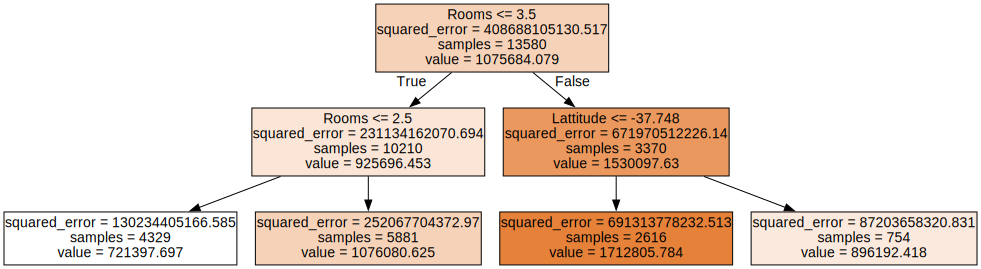

In [21]:
#visualizar

labels = melb_data_X.columns

graph = Source(tree.export_graphviz(tree_reg ,feature_names = labels, max_depth = 2, filled = True))
display(SVG(graph.pipe(format='svg')))

Este árbol se parece mucho al árbol de clasificación que creamos anteriormente. La principal diferencia es que en lugar de predecir una clase en cada nodo, predice un valor. Por ejemplo, supongamos que queremos hacer una predicción para una nueva instancia con "Habitaciones" = 3. Atravesamos el árbol comenzando desde la raíz y eventualmente llegamos al nodo hoja que predice el valor = 1076080.625. Esta predicción es simplemente el valor objetivo promedio de las 5881 instancias de entrenamiento asociadas a este nodo hoja. Esta predicción da como resultado un error cuadrático medio (MSE) igual a 252067704372,97 sobre estas 5881 instancias.

## <u>Algoritmo de entrenamiento CART</u>

El algoritmo CART funciona básicamente de la misma manera que antes, excepto que en lugar de tratar de dividir el conjunto de entrenamiento de una manera que minimice la impureza, ahora intenta dividir el conjunto de entrenamiento de una manera que minimice el MSE.

$$J(k, t_k) = \frac{m_{izquierda}}{m} MSE_{izquierda} + \frac{m_{derecha}}{m} MSE_{derecha}$$

### <u>Modelos basados ​​en árboles frente a modelos lineales </u>

- Si la relación entre la variable dependiente e independiente se aproxima bien mediante un modelo lineal, la regresión lineal superará al modelo basado en árbol.
- Si existe una alta no linealidad y una relación compleja entre las variables dependientes e independientes, un modelo de árbol superará a un método de regresión clásico.
- Si necesitamos construir un modelo que sea fácil de explicar a las personas, un modelo de árbol de decisión siempre funcionará mejor que un modelo lineal. ¡Los modelos de árboles de decisión son aún más simples de interpretar que la regresión lineal!

<b>Nota rápida</b>
- Los árboles de decisión requieren muy poca preparación de datos. En particular, no requieren escalado o centrado de características en absoluto.
- Scikit-Learn usa el algoritmo CART, que produce solo árboles binarios: los nodos que no son hojas siempre tienen dos hijos (es decir, las preguntas solo tienen respuestas sí/no). Sin embargo, otros algoritmos como ID3 pueden producir árboles de decisión con nodos que tienen más de dos hijos.
- Los árboles de decisión son bastante intuitivos y sus decisiones son fáciles de interpretar. Estos modelos a menudo se denominan modelos de caja blanca. Por el contrario, los bosques aleatorios o las redes neuronales generalmente se consideran modelos de caja negra. Los árboles de decisión proporcionan reglas de clasificación agradables y simples que incluso se pueden aplicar manualmente si es necesario (por ejemplo, para la clasificación de flores).

## <u>Bonus</u>:
### <u>Plotear la frontera de decision</u>

La función de abajo plotea la frontera de decisión, tomala cómo dada

In [22]:
def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k')

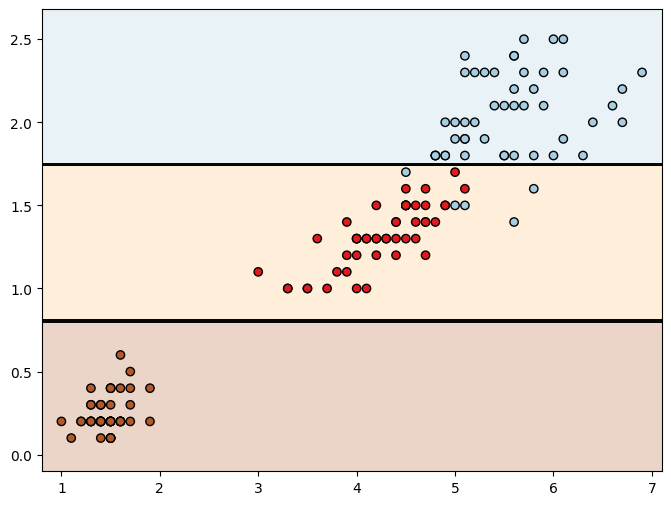

In [23]:
import numpy as np



# Uso solo dos variables para que sea fácil de visualizar
df_iris_X = df_iris[['PetalLengthCm','PetalWidthCm']]
df_iris_y = df_iris.Species

# convert dataframe to numpy array
df_iris_X = df_iris_X.to_numpy()
df_iris_y = df_iris_y.astype('category').cat.codes

# Fit on classifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(df_iris_X, df_iris_y)

plot_decision_boundary(tree_clf, df_iris_X, df_iris_y)